In [2]:
import os
import torch
from torchsummary import summary
import numpy as np
from models.conv_gan import *
from train import *

# define model parameters
output_shape = 24
noise_dim = 200
feature_dim = 32

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Generator=ConvGenerator(noise_dim, feature_dim)
Discriminator=ConvDiscriminator(feature_dim, output_shape)

D_PATH = os.getcwd() + '/models/states/ConvGAN18-09-2022-22-09-38_D.pth'
G_PATH = os.getcwd() + '/models/states/ConvGAN18-09-2022-22-09-38_G.pth'
Discriminator.load_state_dict(torch.load(D_PATH, map_location=torch.device("cpu")))
Generator.load_state_dict(torch.load(G_PATH, map_location=torch.device("cpu")))

# summary(Generator, (1, noise_dim))
# summary(Discriminator, (1, output_shape, output_shape, output_shape))

# Generator.to(device)
# Discriminator.to(device)
# fit(
#     Generator,
#     Discriminator,
#     name="ConvGAN",
#     data_path=os.getcwd() + "/data/segmentation_3d_data.pkl",
#     learning_rate=0.00002,
#     n_epochs=200,
#     batch_size=64,
#     noise_dim=noise_dim,
#     live_mode=False,
#     device=device)

<All keys matched successfully>

In [4]:
from minetest.adapter import *

mta = MinetestAdapter()
mta.connect()

In [9]:
# values used for down-scaling input data
HALF_MAX_ID = 125.5
NUM_IMAGES = 10000

x = torch.Tensor(NUM_IMAGES, noise_dim).normal_(0.0, 1.0).to(device)
s = Generator(x).detach().numpy() * HALF_MAX_ID + HALF_MAX_ID


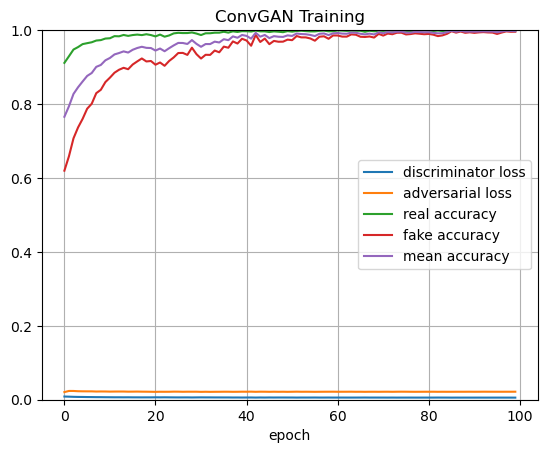

In [14]:
import pickle
import io
import os
import matplotlib.pyplot as plt

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else: return super().find_class(module, name)

with open(os.getcwd() + '/models/logs/ConvGAN18-09-2022-22-09-38_log.pkl','rb') as f:
    stats = CPU_Unpickler(f).load()

x = list(range(len(stats['dl'])))
fig, ax = plt.subplots()
ax.plot(x, [val.detach() for val in stats['dl']], label='discriminator loss')
ax.plot(x, [val.detach() for val in stats['al']], label='adversarial loss')
ax.plot(x, stats['ra'], label='real accuracy')
ax.plot(x, stats['fa'], label='fake accuracy')
ax.plot(x, stats['ma'], label='mean accuracy')
plt.ylim(0, 1)
plt.legend(loc="center right")

ax.set(xlabel='epoch', title='ConvGAN Training')
ax.grid()

fig.savefig("conv_gan_training.png")
plt.show()

In [3]:
import numpy as np
import torch
from numpy.random import rand

FLIP_CHANCE = 1.5
NOISE_LEVEL = 0.4
OFFSET = 0.8
flips = np.floor(rand(3) * FLIP_CHANCE) * OFFSET
real = rand(3).astype(np.float32) * NOISE_LEVEL + OFFSET
fake = rand(3).astype(np.float32) * NOISE_LEVEL
real -= flips
fake += flips

print(real)
print(fake)
print(flips)


[0.23538752 0.9114854  0.9910328 ]
[1.1245997  0.07674543 0.00260577]
[0.8 0.  0. ]
